In [524]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [525]:
# importing train file
df_train = pd.read_csv('Housing-pricing-prediction-train.csv')

In [526]:


df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [527]:
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1163        31.0        TA        Gd     CBlock       TA       TA   
1164         0.0        TA        TA     CBlock      NaN      NaN   
1165         0.0        TA        TA     CBlock       Gd       TA   
1166         0.0        TA        Fa     BrkTil       TA       TA   
1167         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1163           No          BLQ         450          Unf           0   
1164          NaN          NaN           0          NaN           0   
1165           No          ALQ         566          Unf           0   
1166           No          Unf           0          Unf           0   
1167           No          GLQ         457          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1163        432          882    GasA        TA          Y      SBrkr   
1164          0            0    GasA        Ex          Y      SBrkr   
1165        289          855    GasA        TA          Y      SBrkr   
1166        649          649    GasA        TA          N      SBrkr   
1167        326          783    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1163       900         0             0        900             0             0   
1164      1126         0             0       1126             0             0   
1165       855       601             0       1456             0             0   
1166       649       668             0       1317             0             0   
1167       807       702             0       1509             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1163         1         0             3             1          TA   
1164         2         0             2             1          Gd   
1165         2         1             3             1          TA   
1166         1         0             3             1          TA   
1167         2         1             3             1          Gd   

      To

In [528]:
# importing testing file
df_test=pd.read_csv('Housing-pricing-prediction-test.csv')

In [529]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [530]:
df_test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
287       468.0        TA        TA      PConc       Gd       TA           No   
288         0.0        TA        TA      PConc       Gd       TA           No   
289       180.0        TA        TA     CBlock       TA       TA           No   
290         0.0        TA        Gd     CBlock       TA       TA           No   
291       408.0        TA        TA     CBlock       TA       Fa           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
287          GLQ          33          Unf           0       1530         1563   
288          GLQ         686          Unf           0        304          990   
289          ALQ         578          Unf           0        426         1004   
290          ALQ         399          Unf           0        605         1004   
291          BLQ         309          Unf           0        174          483   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
287    GasA        Ex          Y      SBrkr      1563         0             0   
288    GasA        Ex          Y      SBrkr       990         0             0   
289    GasA        Ex          Y      SBrkr      1004         0             0   
290    GasA        Ex          Y      SBrkr      1004       660             0   
291    GasA        TA          Y      SBrkr       483       504             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
287       1563             0             0         2         0             3   
288        990             0             1         1         0             3   
289       1004             1             0         1         0             2   
290       1664             0             0         2         0             3   
291        987             0             0         1         1             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
287             1          Gd             6        Typ           1   
288             1          TA             5        Typ           0   
289             1          TA             5  

In [531]:
# let find out which column is missing in testing data
df_train.columns.difference(df_test.columns)

Index(['SalePrice'], dtype='object')

In [532]:
# concatenating test data and train data
df= pd.concat([df_train,df_test])

In [533]:
df.shape

(1460, 81)

There is 1460 rows and 81 columns in the data set

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

# Missing values and Null values handling

In [535]:
pd.set_option('display.max_rows',None)
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

<AxesSubplot:>

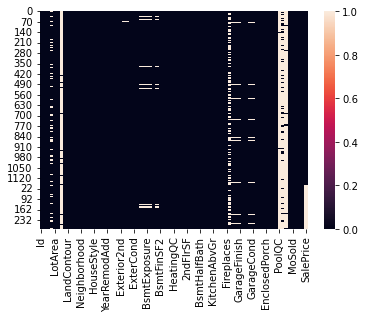

In [536]:
sns.heatmap(df.isnull())

In [537]:
 #Delete features which have more missing values

df=df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1)

In [538]:
df.shape

(1460, 76)

In [539]:
pd.set_option('display.max_rows',None)
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [540]:
pd.set_option('display.max_columns',None)
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL          NaN     4928   Pave      IR1         Lvl   
1  889          20       RL         95.0    15865   Pave      IR1         Lvl   
2  793          60       RL         92.0     9920   Pave      IR1         Lvl   
3  110          20       RL        105.0    11751   Pave      IR1         Lvl   
4  422          20       RL          NaN    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997

In [541]:
# Find unique values in each feature

for i in df.columns:
    print(df[i].nunique(), i)

1460 Id
15 MSSubClass
5 MSZoning
110 LotFrontage
1073 LotArea
2 Street
4 LotShape
4 LandContour
2 Utilities
5 LotConfig
3 LandSlope
25 Neighborhood
9 Condition1
8 Condition2
5 BldgType
8 HouseStyle
10 OverallQual
9 OverallCond
112 YearBuilt
61 YearRemodAdd
6 RoofStyle
8 RoofMatl
15 Exterior1st
16 Exterior2nd
4 MasVnrType
327 MasVnrArea
4 ExterQual
5 ExterCond
6 Foundation
4 BsmtQual
4 BsmtCond
4 BsmtExposure
6 BsmtFinType1
637 BsmtFinSF1
6 BsmtFinType2
144 BsmtFinSF2
780 BsmtUnfSF
721 TotalBsmtSF
6 Heating
5 HeatingQC
2 CentralAir
5 Electrical
753 1stFlrSF
417 2ndFlrSF
24 LowQualFinSF
861 GrLivArea
4 BsmtFullBath
3 BsmtHalfBath
4 FullBath
3 HalfBath
8 BedroomAbvGr
4 KitchenAbvGr
4 KitchenQual
12 TotRmsAbvGrd
7 Functional
4 Fireplaces
6 GarageType
97 GarageYrBlt
3 GarageFinish
5 GarageCars
441 GarageArea
5 GarageQual
5 GarageCond
3 PavedDrive
274 WoodDeckSF
202 OpenPorchSF
120 EnclosedPorch
20 3SsnPorch
76 ScreenPorch
8 PoolArea
21 MiscVal
12 MoSold
5 YrSold
9 SaleType
6 SaleCondition
5

In [542]:
df=df.drop(['Id','Utilities'], axis=1)

In [543]:
df.shape

(1460, 74)

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyle

In [545]:
# we have int, object (categorical) and float type datatypes features

In [546]:
# Statistical Summary

df.describe().T


count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [547]:
# many features are in integer datatype but having categorical information

In [548]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   
2          60       RL         92.0     9920   Pave      IR1         Lvl   
3          20       RL        105.0    11751   Pave      IR1         Lvl   
4          20       RL          NaN    16635   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   
2            7            5       1996          1997     Gable  CompShg   
3            6            6       1977          1977       Hip  CompShg   
4            6            7       1977          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     Plywood     Plywood    BrkFace       480.0        TA        TA   
4     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997.0   
3          TA             7        Typ           1     Attchd       1977.0   
4    

# Visualization

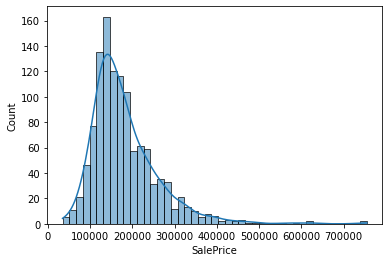

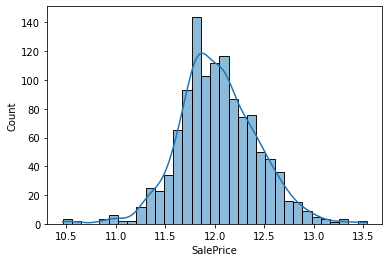

In [549]:
#target variable column
sns.histplot(df['SalePrice'], kde=True)
plt.show()


sns.histplot(np.log(df['SalePrice']), kde=True)
plt.show()

<AxesSubplot:>

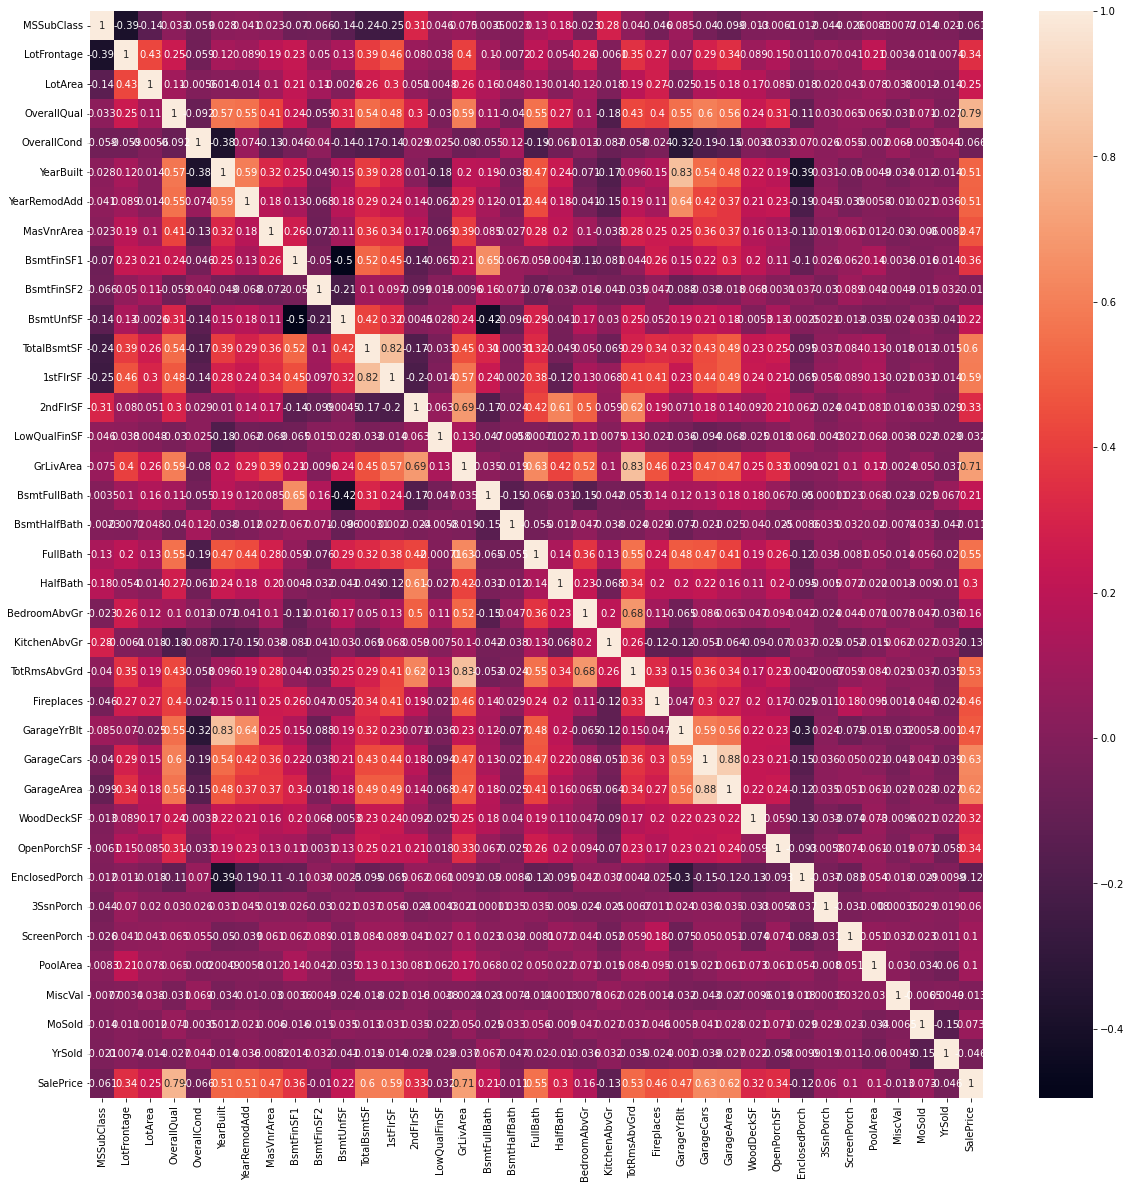

In [550]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [551]:
df['MSSubClass'].isnull().sum()

0

In [552]:
df['MSSubClass'].nunique()

15

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

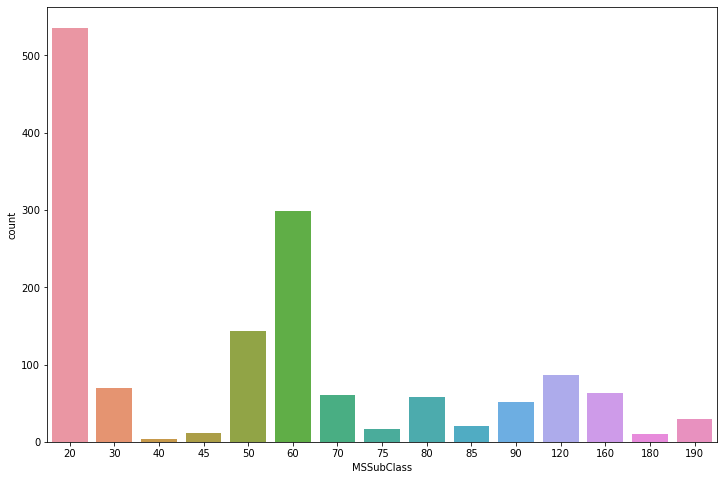

In [553]:
plt.figure(figsize=(12,8))
sns.countplot(df['MSSubClass'])

# MSZoning

In [554]:
df['MSZoning'].isnull().sum()

0

In [555]:
df['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

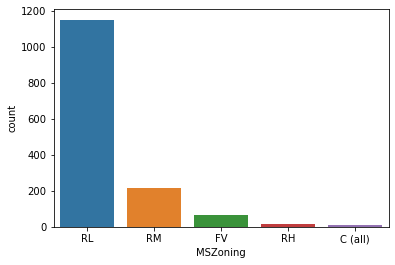

In [556]:
sns.countplot(df['MSZoning'])

In [557]:
#residential low Density Zone house more this data set

In [558]:
df.groupby('MSZoning')['SalePrice'].mean().sort_values

<bound method Series.sort_values of MSZoning
C (all)     75208.888889
FV         209478.461538
RH         131558.375000
RL         191004.181034
RM         129070.975460
Name: SalePrice, dtype: float64>

# LotFontage

In [559]:
def feature_details(i):
    print(i,' has total unique values = ',df[i].nunique() ,'out of ',df.shape[0])
    if df[i].nunique() <10:
        print(df[i].unique())
    print('Feature datatype is = ',df[i].dtypes)
    print('Feature has ',(df[i].isnull().sum()/df.shape[0])*100,'%  missing values')
    
    if df[i].dtypes =='O':
        sns.countplot(df[i])
        plt.show()
        print(df.groupby(i)['SalePrice'].mean().sort_values(ascending=False))
    elif df[i].dtypes !='O':
        sns.scatterplot(df[i],df['SalePrice'])
        plt.show()

In [560]:
df['LotFrontage'].unique().sum()/df.shape[0]

nan

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

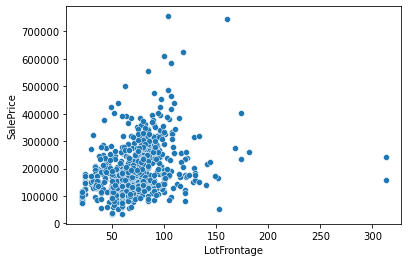

In [561]:
sns.scatterplot(df['LotFrontage'],df['SalePrice'])

# LotArea

LotArea  has total unique values =  1073 out of  1460
Feature datatype is =  int64
Feature has  0.0 %  missing values


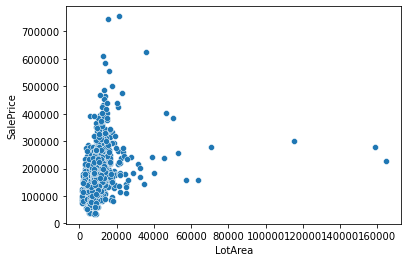

In [562]:
feature_details('LotArea')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

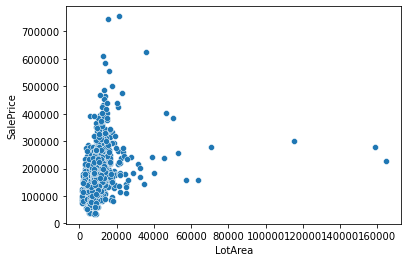

In [563]:
sns.scatterplot(df['LotArea'],df['SalePrice'])

Lot area has a positive line relationship with saleprice with some outlier. lot area increases sale price increses rapidly

In [564]:
df['PoolArea'].value_counts()

0      1453
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64

We can observe that there are 1453 entries in Pool Area column that have a value of 0 this verifies
our hypothisis that each house without a pool has a missing value in Pool QC column and a value of 0 in Pool Area column. S let's fill the missing values in pool QC column with'No Pool 

In [565]:
df_train['PoolQC'].fillna('No pool',inplace=True)

Misc Feature
The Percetage of missing values in Pool QC column is 96% which is very high also. lets take a look at the values of MISC Val column:

In [566]:
df['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1300        1
1400        1
1150        1
620         1
15500       1
8300        1
800         1
54          1
350         1
560         1
2500        1
3500        1
Name: MiscVal, dtype: int64

We can see that Misc Val column has1408 entries with a value of 0.Misc Feature has 1124 missing values. then a s with pool Qc, we can say that each house without a 'miscellaneous feature'has a missing value in  Misc Feature column and a value of 0 in Misc Val column. so let's fill the missing values in Misc Feature column with 'No Feture'

# Street

Street  has total unique values =  2 out of  1460
['Pave' 'Grvl']
Feature datatype is =  object
Feature has  0.0 %  missing values


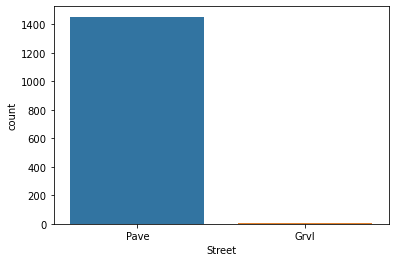

Street
Pave    181684.450172
Grvl    121110.750000
Name: SalePrice, dtype: float64


In [567]:
feature_details('Street')

In [568]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

# LotShape

LotShape  has total unique values =  4 out of  1460
['IR1' 'Reg' 'IR2' 'IR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


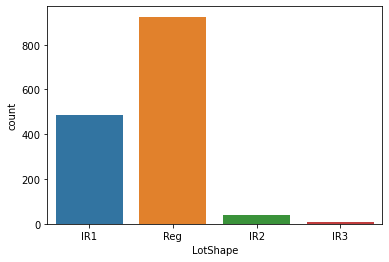

LotShape
IR2    233827.750000
IR3    226120.833333
IR1    206038.464103
Reg    165906.660811
Name: SalePrice, dtype: float64


In [569]:
feature_details('LotShape')

# LandContour

LandContour  has total unique values =  4 out of  1460
['Lvl' 'Bnk' 'HLS' 'Low']
Feature datatype is =  object
Feature has  0.0 %  missing values


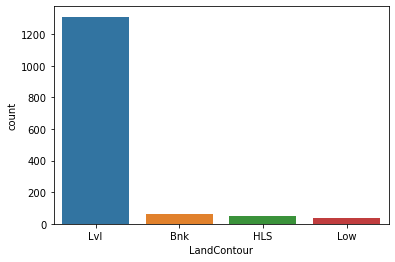

LandContour
HLS    214302.166667
Low    194393.333333
Lvl    181476.572658
Bnk    146163.140000
Name: SalePrice, dtype: float64


In [570]:
feature_details('LandContour')

In [571]:
df.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   
2          60       RL         92.0     9920   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   
2            7            5       1996          1997     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   
1          Unf           2         621         TA         TA          Y   
2          Unf           2         455         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0          205              0          0            0         0   
1          81          207              0          0          224         0   
2         180          130              0          0            0         0   

   MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0        0       2    2007       WD        Normal   128000.0  
1        0      10    2007       WD        Normal   268000.0  
2        0       6    2007       WD        Normal   269790.0

LotConfig  has total unique values =  5 out of  1460
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


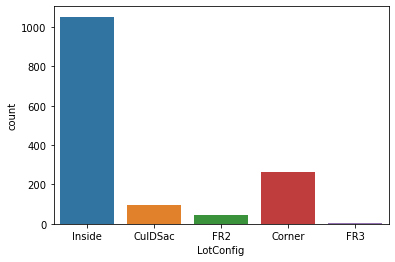

LotConfig
CulDSac    224594.463768
FR3        221500.000000
Corner     182427.635135
Inside     178003.105701
FR2        171138.636364
Name: SalePrice, dtype: float64


In [572]:
feature_details('LotConfig')

# Landslope

LandSlope  has total unique values =  3 out of  1460
['Gtl' 'Mod' 'Sev']
Feature datatype is =  object
Feature has  0.0 %  missing values


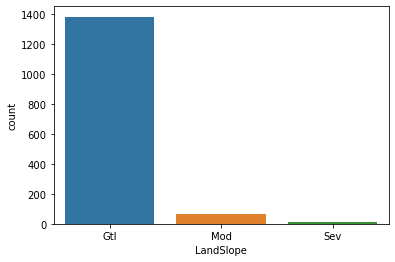

LandSlope
Sev    190160.833333
Mod    185353.313725
Gtl    181203.795475
Name: SalePrice, dtype: float64


In [573]:
 feature_details('LandSlope')

# Neighborhood

Neighborhood  has total unique values =  25 out of  1460
Feature datatype is =  object
Feature has  0.0 %  missing values


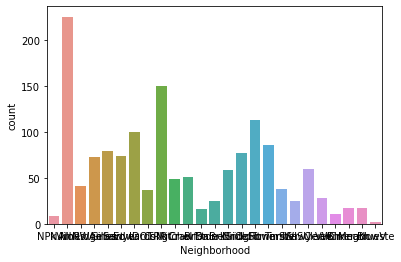

Neighborhood
NoRidge    341260.228571
NridgHt    312548.655738
StoneBr    301145.736842
Veenker    246833.333333
Timber     240579.291667
Somerst    222649.588235
ClearCr    216120.833333
Crawfor    208474.688889
CollgCr    199517.508475
Blmngtn    195987.000000
Gilbert    194790.093750
NWAmes     191643.305085
SawyerW    186909.647059
Mitchel    154654.411765
NAmes      146511.225275
SWISU      142587.333333
NPkVill    141968.750000
Blueste    137500.000000
Sawyer     135029.866667
OldTown    133947.197674
Edwards    128544.216867
BrkSide    122836.000000
BrDale     104081.818182
IDOTRR     101322.666667
MeadowV     88444.444444
Name: SalePrice, dtype: float64


In [574]:
feature_details('Neighborhood')

In [575]:
df.head(1)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0          205              0          0            0         0   

   MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0        0       2    2007       WD        Normal   128000.0

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyle

# Condition1 

Condition1  has total unique values =  9 out of  1460
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Feature datatype is =  object
Feature has  0.0 %  missing values


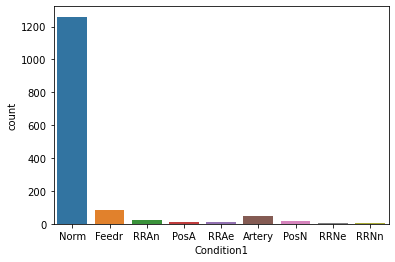

Condition1
RRNn      238000.000000
PosA      237833.333333
PosN      219264.705882
RRNe      190750.000000
RRAn      190074.850000
Norm      184692.003980
Feedr     142799.731343
RRAe      139044.444444
Artery    137926.315789
Name: SalePrice, dtype: float64


In [577]:
feature_details('Condition1')

In [578]:
df.groupby('Condition1')['SalePrice'].count()

Condition1
Artery      38
Feedr       67
Norm      1005
PosA         6
PosN        17
RRAe         9
RRAn        20
RRNe         2
RRNn         4
Name: SalePrice, dtype: int64

In [579]:
df[df['Condition1']=='RRNn']

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
279          70       RM         60.0     6155   Pave      IR1         Lvl   
418          20       RL         84.0    11670   Pave      IR1         Lvl   
463          60       RL          NaN     8755   Pave      IR1         Lvl   
493          20       RL         85.0    10182   Pave      IR1         Lvl   
58           90       RM        110.0     8472   Grvl      IR2         Bnk   

    LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
279       FR3       Gtl      BrkSide       RRNn      Feedr     1Fam   
418    Corner       Gtl      Somerst       RRNn       Norm     1Fam   
463       FR2       Gtl      Gilbert       RRNn       Norm     1Fam   
493   CulDSac       Gtl      Somerst       RRNn       Norm     1Fam   
58     Corner       Mod       IDOTRR       RRNn       Norm   Duplex   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
279     2Story            6            8       1920          1999     Gable   
418     1Story            9            5       2006          2006       Hip   
463     2Story            7            5       1999          1999     Gable   
493     1Story            8            5       2006          2006       Hip   
58      1Story            5            5       1963          1963     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
279  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   
418  CompShg     VinylSd     ImStucc      Stone       302.0        Ex   
463  CompShg     VinylSd     VinylSd    BrkFace       298.0        Gd   
493  CompShg     VinylSd     VinylSd      Stone       420.0        Gd   
58   CompShg     Wd Sdng     Wd Sdng       None         0.0        Fa   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
279        TA     BrkTil       Fa       Fa           Mn          Unf   
418        TA      PConc       Ex       Gd           No          Unf   
463        TA      PConc       Gd       TA           No          ALQ   
493        TA      PConc       Ex       TA           Mn          GLQ   
58         TA     CBlock       Gd       TA           Gd          LwQ   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
279           0          Unf           0        611          611    GasA   
418           0          Unf           0       1905         1905    GasA   
463         772          Unf           0        220          992    GasA   
493        1220          Unf           0        440         1660    GasA   
58          104          GLQ         712          0          816    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
279        Ex          Y      SBrkr       751       611             0   
418        Ex          Y      SBrkr      1905         0             0   
463        Ex          Y      SBrkr      1022      1038             0   
493        Ex          Y      SBrkr      1660         0             0   
58         TA          N      SBrkr       816         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
279       1362             0             0         2         0             3   
418       1905             0             0         2         0             3   
463       2060             1             0         2         1             3   
493       1660             1             0         2         0             3   
58         816             1             0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
279             1          TA             6        Typ           0     Detchd   
418             1          Ex             8        Typ           1     Attchd   
463             1          Gd             8        Typ           1    BuiltIn   
493             1          Gd             8        Typ       

# Condition2

Condition2  has total unique values =  8 out of  1460
['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
Feature datatype is =  object
Feature has  0.0 %  missing values


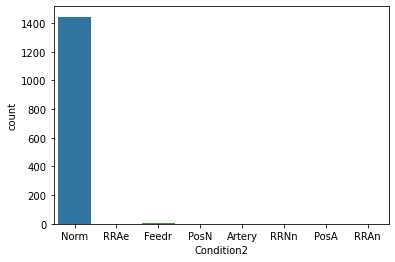

Condition2
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
Norm      181697.129983
RRAn      136905.000000
RRNn      125000.000000
Feedr     121166.666667
Artery    106500.000000
Name: SalePrice, dtype: float64


In [580]:
feature_details('Condition2')

In [581]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

# BldgType

BldgType  has total unique values =  5 out of  1460
['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
Feature datatype is =  object
Feature has  0.0 %  missing values


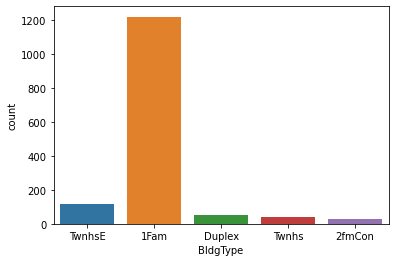

BldgType
TwnhsE    186066.111111
1Fam      185602.300714
Twnhs     139437.931034
Duplex    133871.609756
2fmCon    133737.037037
Name: SalePrice, dtype: float64


In [582]:
feature_details('BldgType')

HouseStyle  has total unique values =  8 out of  1460
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
Feature datatype is =  object
Feature has  0.0 %  missing values


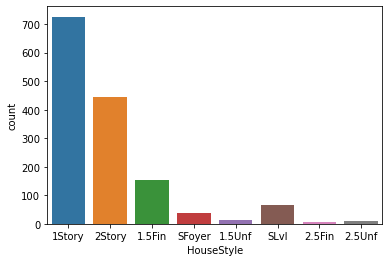

HouseStyle
2.5Fin    223285.714286
2Story    212193.515235
1Story    175940.826990
SLvl      170140.851064
2.5Unf    158690.000000
1.5Fin    138546.363636
SFoyer    137508.000000
1.5Unf    113216.666667
Name: SalePrice, dtype: float64


In [583]:
feature_details('HouseStyle')

# OverallQual

OverallQual  has total unique values =  10 out of  1460
Feature datatype is =  int64
Feature has  0.0 %  missing values


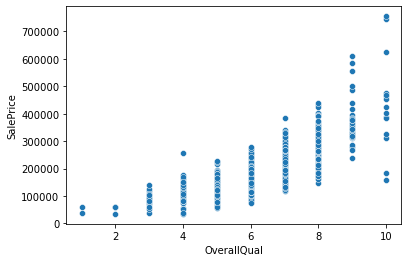

In [584]:
feature_details('OverallQual')

OverallCond  has total unique values =  9 out of  1460
[5 6 7 4 8 2 3 9 1]
Feature datatype is =  int64
Feature has  0.0 %  missing values


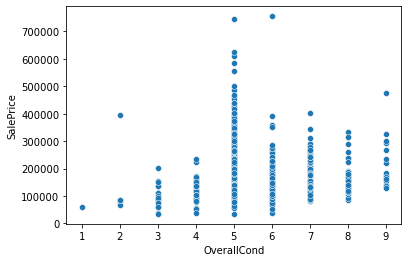

In [585]:
feature_details('OverallCond')

# YearBuilt

YearBuilt  has total unique values =  112 out of  1460
Feature datatype is =  int64
Feature has  0.0 %  missing values


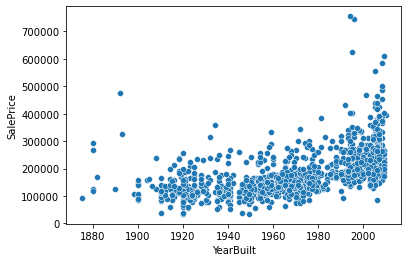

In [586]:
feature_details('YearBuilt')

In [587]:
The newly built house have higgest  positive relation between sale price

SyntaxError: invalid syntax (Temp/ipykernel_18648/3384662795.py, line 1)

In [ ]:
df.columns

# YearRemodAdd

In [ ]:
feature_details('YearRemodAdd')

In [ ]:
feature_details('RoofStyle')

In [ ]:
feature_details('RoofMatl')

In [ ]:
feature_details('Exterior1st')

In [ ]:
feature_details('Exterior2nd')

# MasVnrType

In [ ]:
feature_details('MasVnrType')

In [ ]:
df.columns

# MasVnrArea

In [ ]:
feature_details('MasVnrArea')

# ExterQual

In [ ]:
feature_details('ExterQual')

# ExterCond'

In [ ]:
feature_details('ExterCond')

# Foundation

In [ ]:
feature_details('Foundation')

# BsmtQual

In [ ]:
feature_details('BsmtQual')

# BsmtCond

In [ ]:
feature_details('BsmtCond')

In [ ]:
df.columns

# BsmtExposure

In [ ]:
feature_details('BsmtExposure')

# BsmtFinType1

In [ ]:
feature_details('BsmtFinType1')

# BsmtFinType2

In [ ]:
feature_details('BsmtFinType2')

# BsmtFinSF2

In [ ]:
feature_details('BsmtFinSF2')

# BsmtUnfSF

In [ ]:
feature_details('BsmtUnfSF')

In [ ]:
feature_details('TotalBsmtSF')

In [ ]:
feature_details('Heating')

In [ ]:
feature_details('HeatingQC')

In [ ]:
feature_details('CentralAir')

# Electrical

In [ ]:
feature_details('Electrical')

In [ ]:
1stFlrSF

In [ ]:
feature_details('1stFlrSF')

# 2ndFlrSF

In [ ]:
feature_details('2ndFlrSF')

# LowQualFinSF

In [ ]:
feature_details('LowQualFinSF')

# GrLivArea

In [ ]:
feature_details('GrLivArea')

# BsmtFullBath

In [ ]:
feature_details('BsmtFullBath')

In [ ]:
df.columns

# 'FullBath

In [ ]:
feature_details('FullBath')

In [ ]:
feature_details('HalfBath')

# Bedroom

In [ ]:
feature_details('BedroomAbvGr')

# KitchenAbvGr

In [ ]:
feature_details('KitchenAbvGr')

# KitchenQual

In [ ]:
feature_details('KitchenQual')

# TotRmsAbvGrd

In [ ]:
feature_details('TotRmsAbvGrd')

# Functional

In [ ]:
feature_details('Functional')

# Fireplaces

In [ ]:
feature_details('Fireplaces')

# GarageType

In [ ]:
feature_details('GarageType')

# GarageYrBlt

In [ ]:
feature_details('GarageYrBlt')

In [ ]:
GarageFinish

In [ ]:
feature_details('GarageFinish')

# GarageCars


In [ ]:
feature_details('GarageCars')


# GarageCond

In [ ]:
feature_details('GarageCond')

In [ ]:
df.columns

# PavedDrive

In [ ]:
feature_details('PavedDrive')

# WoodDeckSF

In [ ]:
feature_details('WoodDeckSF')

# OpenPorchSF

In [ ]:
feature_details('OpenPorchSF')

# EnclosedPorch

In [ ]:
feature_details('EnclosedPorch')

# 3SsnPorch'

In [ ]:
feature_details('3SsnPorch')

# ScreenPorch

In [ ]:
feature_details('ScreenPorch')

# PoolArea

In [ ]:
feature_details('PoolArea')

# MiscVal

In [ ]:
feature_details('MiscVal')

# MoSold

In [ ]:
feature_details('MoSold')

# YrSold

In [ ]:
feature_details('YrSold')

# SaleType

In [ ]:
feature_details('SaleType')

# SaleCondition

In [ ]:
feature_details('SaleCondition')

In [ ]:
df.columns

In [588]:
# as 3 features are providing same information as 1 feature, lets drop those 3 features and have that 1 

df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)

In [590]:
df.shape

(1460, 71)

In [591]:
continuous= [x for x in df.columns if df[x].dtypes!='O']
categorical= [x for x in df.columns if df[x].dtypes=='O']

In [592]:
len(continuous), len(categorical), df.shape[1]

(34, 37, 71)

In [593]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL          NaN     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   
2          60       RL         92.0     9920   Pave      IR1         Lvl   
3          20       RL        105.0    11751   Pave      IR1         Lvl   
4          20       RL          NaN    16635   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   
2            7            5       1996          1997     Gable  CompShg   
3            6            6       1977          1977       Hip  CompShg   
4            6            7       1977          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     Plywood     Plywood    BrkFace       480.0        TA        TA   
4     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0     CBlock       Gd       TA           No          ALQ          Unf   
1      PConc       TA       Gd           Gd          ALQ          Rec   
2      PConc       Gd       TA           Av          GLQ          Unf   
3     CBlock       Gd       TA           No          BLQ          Unf   
4     CBlock       Gd       TA           No          ALQ          Unf   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0         1078    GasA        TA          Y      SBrkr       958         0   
1         2217    GasA        Ex          Y      SBrkr      2217         0   
2         1117    GasA        Ex          Y      SBrkr      1127       886   
3         1844    GasA        Ex          Y      SBrkr      1844         0   
4         1602    GasA        Gd          Y      SBrkr      1602         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             5        Typ   
1             4             1          Gd             8        Typ   
2             3             1          TA             8        Typ   
3             3             1          TA             7        Typ   
4             3             1          Gd             8        Typ   

   Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0           1     Attchd       1977.0          RFn           2         440   
1           1     Attchd       1970.0          Unf           2         621   
2           1     Attchd       1997.0          Unf           2         455   
3           1     Attchd       1977.0          RFn           2         

In [594]:
df['LotFrontage'].dtypes  , df['GarageYrBlt'].dtypes , df['MasVnrArea'].dtypes

(dtype('float64'), dtype('float64'), dtype('float64'))

In [595]:
df['LotFrontage'].mode()

0    60.0
dtype: float64

# Fill Null Vlaues

In [596]:
# Continuous feature null values

cont_null=[x for x in continuous if df[x].isnull().sum()>0]

for i in cont_null:
    df[i].fillna(df[i].mode()[0],inplace=True)


In [597]:
df[cont_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
SalePrice      0
dtype: int64

In [598]:
df[continuous].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [599]:
df[categorical].isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [600]:
cat_null=[x for x in categorical if df[x].isnull().sum()>0]

for i in cat_null:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [601]:
df[categorical].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [602]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt 

In [ ]:
All missing values removed

# Outliers

In [604]:
 #Basically, we check and handle outliers in continuous features only

# There are many methods to check outliers, we use here BoxPlot

df[continuous]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         60.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         60.0    16635            6            7       1977   
5             60         58.0    14054            7            5       2006   
6             20         60.0    11341            5            6       1957   
7             20         88.0    13125            5            4       1957   
8             20         70.0     9170            5            7       1965   
9             50         80.0     8480            5            5       1947   
10            50         50.0     8600            6            6       1937   
11            60         44.0     9548            7            6       2003   
12            20        129.0     9196            7            5       2003   
13            20         80.0     8892            5            5       1960   
14            50         59.0    16466            5            7       1955   
15            70         55.0    10592            6            7       1923   
16            30         60.0     5890            6            8       1930   
17            20         64.0     7314            7            5       2007   
18            20         60.0     7917            6            7       1976   
19           160         24.0     2016            5            5       1970   
20            60         80.0    12435            7            5       2001   
21            85         70.0     8445            5            7       1972   
22            20         68.0     9717            5            6       1950   
23            20         60.0    10659            5            6       1961   
24            20         71.0     9230            5            8       1965   
25            20         60.0    21000            6            5       1953   
26            30         60.0    25339            5            7       1918   
27            20         88.0    11394            9            2       2010   
28            45         58.0     6380            5            6       1922   
29            70         74.0    11988            6            7       1934   
30           120         61.0     7658            9            5       2005   
31            60         60.0     3378            7            8       1946   
32            90         60.0    18890            5            5       1977   
33            50         60.0    12358            5            6       1941   
34            60         60.0    14762            5            6       1948   
35            20        120.0    10356            5            6       1975   
36            20         80.0    10400            7            5       1976   
37            20         84.0    12615            6            7       1950   
38            85         60.0     7540            6            6       1978   
39            40         50.0     9100            5            6       1930   
40            20        141.0    31770            6            5       1960   
41            20         70.0    13300            5            7       1956   
42           160         30.0     3180            7            5       2005   
43           160         24.0     2522            6            5       2004   
44            80         65.0     8385            5            8       1977   
45            20         76.0     8314            5            7       1982   
46            60         60.0     8123            6            5       2000   
47            20        100.0    12000            5            7       1948   
48            20         50.0     5000            1            3       1946   
49            20         70.0     7931            5     

In [ ]:
Before that we need to handle features with Years details:

YearBuilt - when house build
YearRemodAdd  - when modification done
GarageYrBlt - garage build year
yearsold - when the house sold

we can extract some useful information from here, like total age of house at the time of sell years after modification at the time of sell garage age at the time of sell we even dnt require YrSold if we able to collect abouve informations because these details will definately help

In [605]:
df['HouseAge']= df['YrSold']-df['YearBuilt']
df['ModificationAge']=df['YrSold']-df['YearRemodAdd']
df['GarageAge']=df['YrSold']-df['GarageYrBlt']

In [606]:
# So now, we can drop the year feature

df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace=True)

In [607]:
df[[x for x in df.columns if df[x].dtypes !='O' ]]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0            120         60.0     4928            6            5         0.0   
1             20         95.0    15865            8            6         0.0   
2             60         92.0     9920            7            5         0.0   
3             20        105.0    11751            6            6       480.0   
4             20         60.0    16635            6            7       126.0   
5             60         58.0    14054            7            5         0.0   
6             20         60.0    11341            5            6       180.0   
7             20         88.0    13125            5            4        67.0   
8             20         70.0     9170            5            7         0.0   
9             50         80.0     8480            5            5         0.0   
10            50         50.0     8600            6            6         0.0   
11            60         44.0     9548            7            6       223.0   
12            20        129.0     9196            7            5         0.0   
13            20         80.0     8892            5            5        66.0   
14            50         59.0    16466            5            7         0.0   
15            70         55.0    10592            6            7         0.0   
16            30         60.0     5890            6            8         0.0   
17            20         64.0     7314            7            5        82.0   
18            20         60.0     7917            6            7       174.0   
19           160         24.0     2016            5            5       304.0   
20            60         80.0    12435            7            5       172.0   
21            85         70.0     8445            5            7         0.0   
22            20         68.0     9717            5            6         0.0   
23            20         60.0    10659            5            6         0.0   
24            20         71.0     9230            5            8       166.0   
25            20         60.0    21000            6            5       184.0   
26            30         60.0    25339            5            7         0.0   
27            20         88.0    11394            9            2       350.0   
28            45         58.0     6380            5            6         0.0   
29            70         74.0    11988            6            7         0.0   
30           120         61.0     7658            9            5       412.0   
31            60         60.0     3378            7            8         0.0   
32            90         60.0    18890            5            5         1.0   
33            50         60.0    12358            5            6         0.0   
34            60         60.0    14762            5            6         0.0   
35            20        120.0    10356            5            6         0.0   
36            20         80.0    10400            7            5       189.0   
37            20         84.0    12615            6            7         0.0   
38            85         60.0     7540            6            6         0.0   
39            40         50.0     9100            5            6         0.0   
40            20        141.0    31770            6            5       112.0   
41            20         70.0    13300            5            7         0.0   
42           160         30.0     3180            7            5         0.0   
43           160         24.0     2522            6            5        50.0   
44            80         65.0     8385            5            8       220.0   
45            20         76.0     8314            5            7         0.0   
46            60         60.0     8123            6            5        16.0   
47            20        100.0    12000            5            7         0.0   
48            20         50.0     5000            1            3         0.0   
49    

In [608]:
# many continuous features are is categorical in nature, we have to avoid outlier detection on those features

outlier=['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','MoSold','HouseAge','ModificationAge','GarageAge']

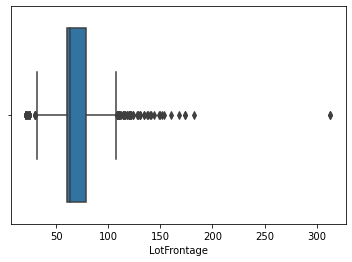

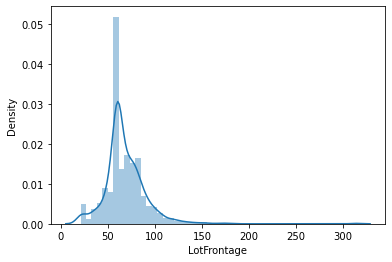

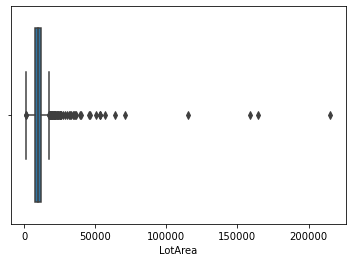

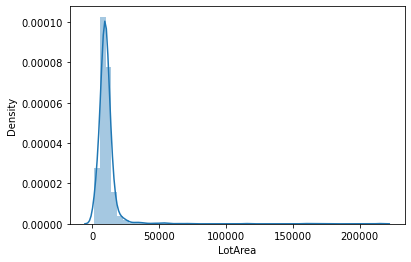

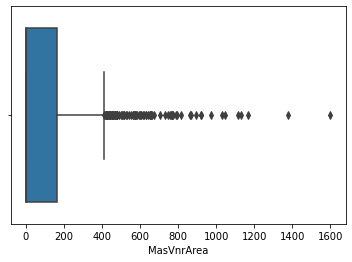

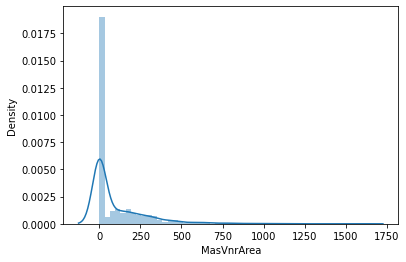

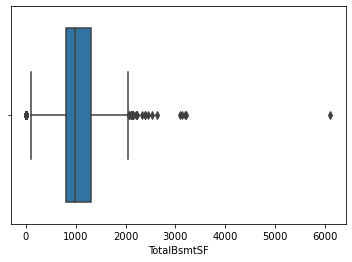

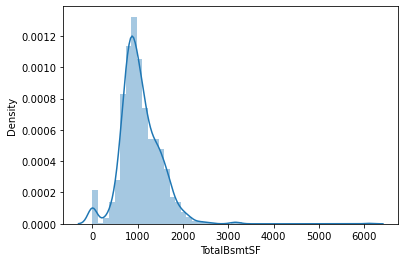

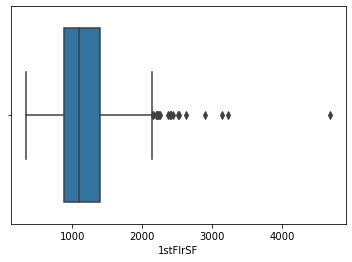

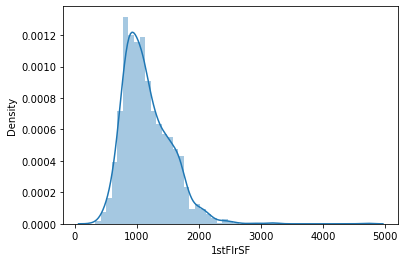

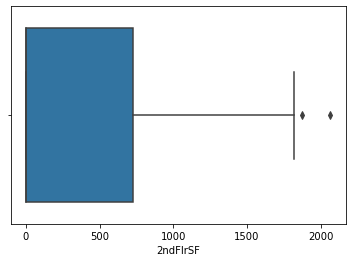

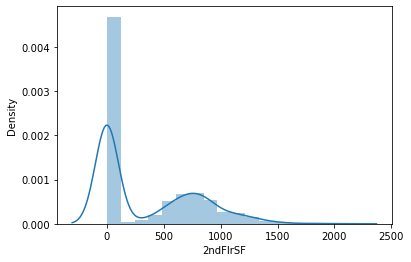

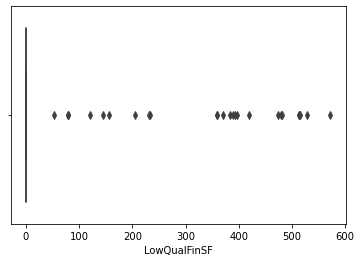

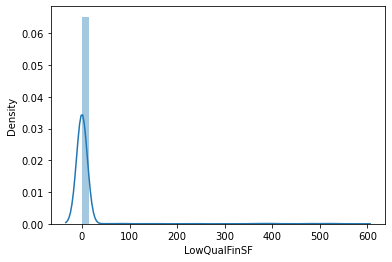

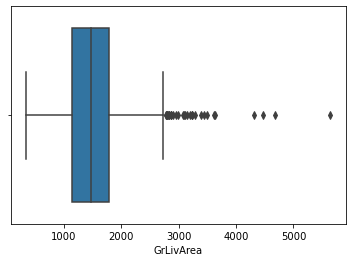

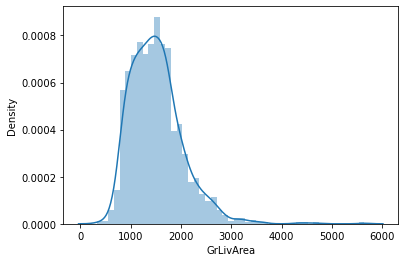

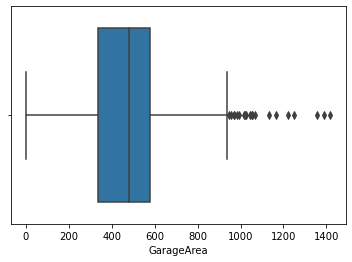

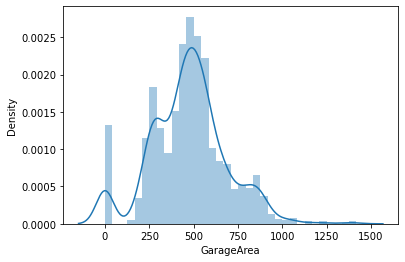

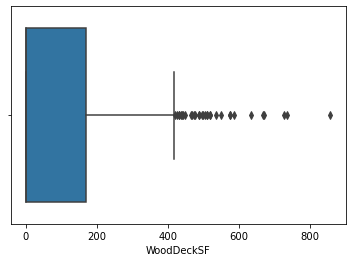

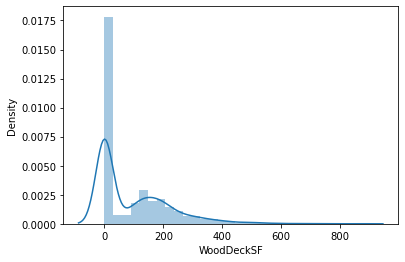

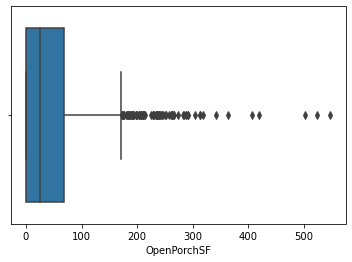

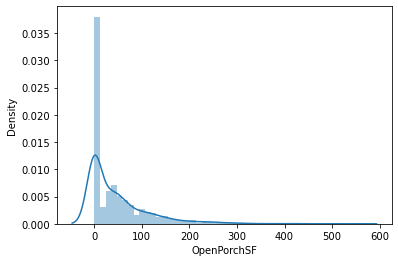

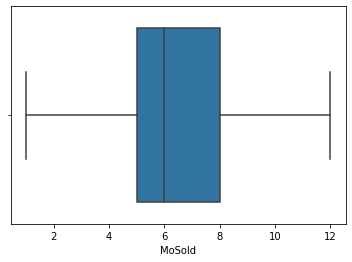

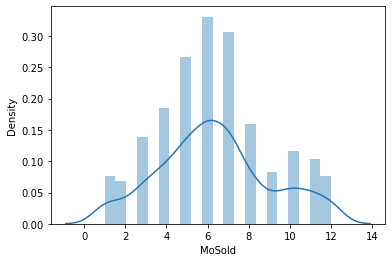

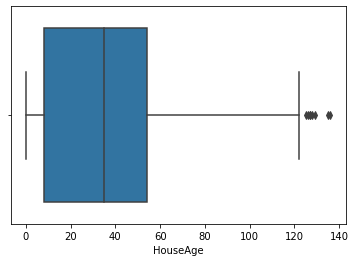

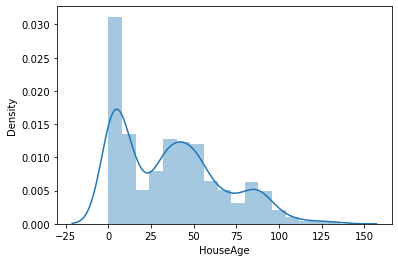

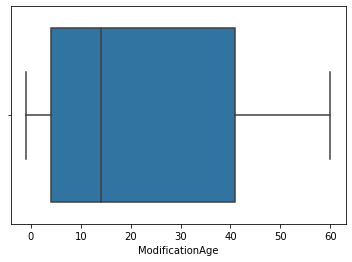

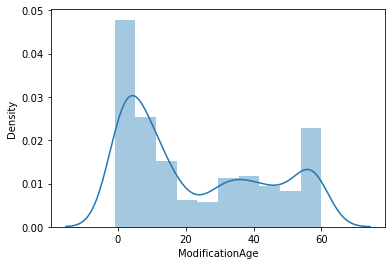

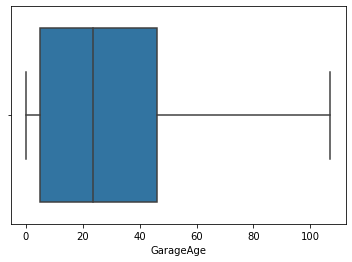

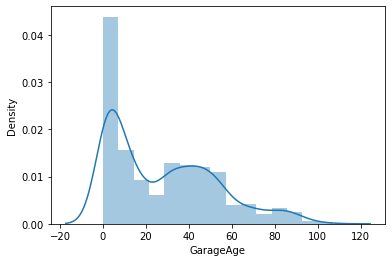

In [609]:
for i in outlier:
    sns.boxplot(df[i])
    plt.show()
    sns.distplot(df[i])
    plt.show()

In [610]:
df[outlier].skew()

LotFrontage         2.504092
LotArea            12.207688
MasVnrArea          2.677616
TotalBsmtSF         1.524255
1stFlrSF            1.376757
2ndFlrSF            0.813030
LowQualFinSF        9.011341
GrLivArea           1.366560
GarageArea          0.179981
WoodDeckSF          1.541376
OpenPorchSF         2.364342
MoSold              0.212053
HouseAge            0.609030
ModificationAge     0.502489
GarageAge           0.711413
dtype: float64

In [611]:
for i in outlier:
    IQR= df[i].quantile(.75)-df[i].quantile(.25)
    lower=df[i].quantile(.25) - (1.5 * IQR)
    upper=df[i].quantile(.75) + (1.5 * IQR)
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])

In [612]:
df[outlier].skew()

LotFrontage        0.337944
LotArea            0.208492
MasVnrArea         1.287759
TotalBsmtSF        0.237240
1stFlrSF           0.664134
2ndFlrSF           0.800109
LowQualFinSF       0.000000
GrLivArea          0.593556
GarageArea        -0.069685
WoodDeckSF         1.083673
OpenPorchSF        1.136301
MoSold             0.212053
HouseAge           0.588162
ModificationAge    0.502489
GarageAge          0.711413
dtype: float64

In [613]:
df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL         60.0   4928.0   Pave      IR1         Lvl   
1          20       RL         95.0  15865.0   Pave      IR1         Lvl   
2          60       RL         92.0   9920.0   Pave      IR1         Lvl   
3          20       RL        105.0  11751.0   Pave      IR1         Lvl   
4          20       RL         60.0  16635.0   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
4            6            7     Gable  CompShg     CemntBd     CmentBd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None       0.000        TA        TA     CBlock       Gd       TA   
1       None       0.000        Gd        Gd      PConc       TA       Gd   
2       None       0.000        Gd        TA      PConc       Gd       TA   
3    BrkFace     410.625        TA        TA     CBlock       Gd       TA   
4      Stone     126.000        Gd        TA     CBlock       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating HeatingQC  \
0           No          ALQ          Unf       1078.0    GasA        TA   
1           Gd          ALQ          Rec       2052.0    GasA        Ex   
2           Av          GLQ          Unf       1117.0    GasA        Ex   
3           No          BLQ          Unf       1844.0    GasA        Ex   
4           No          ALQ          Unf       1602.0    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr   958.000       0.0           0.0      958.0   
1          Y      SBrkr  2155.125       0.0           0.0     2217.0   
2          Y      SBrkr  1127.000     886.0           0.0     2013.0   
3          Y      SBrkr  1844.000       0.0           0.0     1844.0   
4          Y      SBrkr  1602.000       0.0           0.0     1602.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  \
0          TA             5        Typ           1     Attchd          RFn   
1          Gd             8        Typ           1     Attchd          Unf   
2          TA             8        Typ           1     Attchd          Unf   
3          TA             7        Typ           1     Attchd          RFn   
4          Gd             8        Typ           1     Attchd          Fin   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0           2       440.0         TA         TA          Y         0.0   
1           2       621.0         TA         TA          Y        81.0   
2           2       455.0         TA         TA          Y       180.0   
3           2       5

In [614]:
df.shape

(1460, 70)

In [615]:
continuous= [x for x in df.columns if df[x].dtypes!='O']
categorical= [x for x in df.columns if df[x].dtypes=='O']

In [616]:
df[continuous].shape , df[categorical].shape

((1460, 33), (1460, 37))

In [ ]:
# Continuous data has been handeled for outliers

In [617]:
df[continuous]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0            120         60.0   4928.0            6            5       0.000   
1             20         95.0  15865.0            8            6       0.000   
2             60         92.0   9920.0            7            5       0.000   
3             20        105.0  11751.0            6            6     410.625   
4             20         60.0  16635.0            6            7     126.000   
5             60         58.0  14054.0            7            5       0.000   
6             20         60.0  11341.0            5            6     180.000   
7             20         88.0  13125.0            5            4      67.000   
8             20         70.0   9170.0            5            7       0.000   
9             50         80.0   8480.0            5            5       0.000   
10            50         50.0   8600.0            6            6       0.000   
11            60         44.0   9548.0            7            6     223.000   
12            20        107.5   9196.0            7            5       0.000   
13            20         80.0   8892.0            5            5      66.000   
14            50         59.0  16466.0            5            7       0.000   
15            70         55.0  10592.0            6            7       0.000   
16            30         60.0   5890.0            6            8       0.000   
17            20         64.0   7314.0            7            5      82.000   
18            20         60.0   7917.0            6            7     174.000   
19           160         31.5   2016.0            5            5     304.000   
20            60         80.0  12435.0            7            5     172.000   
21            85         70.0   8445.0            5            7       0.000   
22            20         68.0   9717.0            5            6       0.000   
23            20         60.0  10659.0            5            6       0.000   
24            20         71.0   9230.0            5            8     166.000   
25            20         60.0  17673.5            6            5     184.000   
26            30         60.0  17673.5            5            7       0.000   
27            20         88.0  11394.0            9            2     350.000   
28            45         58.0   6380.0            5            6       0.000   
29            70         74.0  11988.0            6            7       0.000   
30           120         61.0   7658.0            9            5     410.625   
31            60         60.0   3378.0            7            8       0.000   
32            90         60.0  17673.5            5            5       1.000   
33            50         60.0  12358.0            5            6       0.000   
34            60         60.0  14762.0            5            6       0.000   
35            20        107.5  10356.0            5            6       0.000   
36            20         80.0  10400.0            7            5     189.000   
37            20         84.0  12615.0            6            7       0.000   
38            85         60.0   7540.0            6            6       0.000   
39            40         50.0   9100.0            5            6       0.000   
40            20        107.5  17673.5            6            5     112.000   
41            20         70.0  13300.0            5            7       0.000   
42           160         31.5   3180.0            7            5       0.000   
43           160         31.5   2522.0            6            5      50.000   
44            80         65.0   8385.0            5            8     220.000   
45            20         76.0   8314.0            5            7       0.000   
46            60         60.0   8123.0            6            5      16.000   
47            20        100.0  12000.0            5            7       0.000   
48            20         50.0   5000.0            1            3       0.000   
49    

# Encoding

# of categorical features

In [618]:
df[categorical].head(5)

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
0       RL   Pave      IR1         Lvl    Inside       Gtl      NPkVill   
1       RL   Pave      IR1         Lvl    Inside       Mod        NAmes   
2       RL   Pave      IR1         Lvl   CulDSac       Gtl      NoRidge   
3       RL   Pave      IR1         Lvl    Inside       Gtl       NWAmes   
4       RL   Pave      IR1         Lvl       FR2       Gtl       NWAmes   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm   TwnhsE     1Story     Gable  CompShg     Plywood   
1       Norm       Norm     1Fam     1Story      Flat  Tar&Grv     Wd Sdng   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     MetalSd   
3       Norm       Norm     1Fam     1Story       Hip  CompShg     Plywood   
4       Norm       Norm     1Fam     1Story     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     Plywood       None        TA        TA     CBlock       Gd       TA   
1     Wd Sdng       None        Gd        Gd      PConc       TA       Gd   
2     MetalSd       None        Gd        TA      PConc       Gd       TA   
3     Plywood    BrkFace        TA        TA     CBlock       Gd       TA   
4     CmentBd      Stone        Gd        TA     CBlock       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          ALQ          Unf    GasA        TA          Y   
1           Gd          ALQ          Rec    GasA        Ex          Y   
2           Av          GLQ          Unf    GasA        Ex          Y   
3           No          BLQ          Unf    GasA        Ex          Y   
4           No          ALQ          Unf    GasA        Gd          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          TA        Typ     Attchd          RFn         TA   
1      SBrkr          Gd        Typ     Attchd          Unf         TA   
2      SBrkr          TA        Typ     Attchd          Unf         TA   
3      SBrkr          TA        Typ     Attchd          RFn         TA   
4      SBrkr          Gd        Typ     Attchd          Fin         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y      COD        Normal  
4         TA          Y       WD        Normal

In [619]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print('*' * 50)

MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)']
**************************************************
Street
['Pave' 'Grvl']
**************************************************
LotShape
['IR1' 'Reg' 'IR2' 'IR3']
**************************************************
LandContour
['Lvl' 'Bnk' 'HLS' 'Low']
**************************************************
LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
**************************************************
LandSlope
['Gtl' 'Mod' 'Sev']
**************************************************
Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
**************************************************
Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
**************************************************
Condition2
['Norm' 'RRAe' 'Feedr' '

In [620]:
ordinal_cols = {
    'ExterQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2},
    'ExterCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
    'BsmtQual': {'Ex':5,'Gd':4,'TA':3,'Fa':2},
    'BsmtCond' : {'Gd':4,'TA':3,'Fa':2,'Po':1},
    'BsmtExposure' : {'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1},
    'BsmtFinType1' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'BsmtFinType2' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'HeatingQC' :{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1  },
    'KitchenQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageFinish' : {'Fin':3,'RFn':2,'Unf':1},
    
      
    
    
    'Utilities' : {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
}





In [621]:
df.replace(ordinal_cols, inplace = True)


In [622]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL         60.0   4928.0   Pave      IR1         Lvl   
1          20       RL         95.0  15865.0   Pave      IR1         Lvl   
2          60       RL         92.0   9920.0   Pave      IR1         Lvl   
3          20       RL        105.0  11751.0   Pave      IR1         Lvl   
4          20       RL         60.0  16635.0   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
4            6            7     Gable  CompShg     CemntBd     CmentBd   

  MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       None       0.000          3          3     CBlock         4         3   
1       None       0.000          4          4      PConc         3         4   
2       None       0.000          4          3      PConc         4         3   
3    BrkFace     410.625          3          3     CBlock         4         3   
4      Stone     126.000          4          3     CBlock         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinType2  TotalBsmtSF Heating  HeatingQC  \
0             2             6             2       1078.0    GasA          3   
1             5             6             4       2052.0    GasA          5   
2             4             7             2       1117.0    GasA          5   
3             2             5             2       1844.0    GasA          5   
4             2             6             2       1602.0    GasA          4   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr   958.000       0.0           0.0      958.0   
1          Y      SBrkr  2155.125       0.0           0.0     2217.0   
2          Y      SBrkr  1127.000     886.0           0.0     2013.0   
3          Y      SBrkr  1844.000       0.0           0.0     1844.0   
4          Y      SBrkr  1602.000       0.0           0.0     1602.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

   KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageFinish  \
0            3             5        Typ           1     Attchd             2   
1            4             8        Typ           1     Attchd             1   
2            3             8        Typ           1     Attchd             1   
3            3             7        Typ           1     Attchd             2   
4            4             8        Typ           1     Attchd             3   

   GarageCars  GarageArea  GarageQual  GarageCond PavedDrive  WoodDeckSF  \
0           2       440.0           3           3          Y         0.0   
1           2       621.0           3           3          Y        81.0   
2           2       455.0    

In [623]:
df.shape

(1460, 70)

In [624]:
encoded=pd.get_dummies(df)

In [625]:
encoded.shape

(1460, 222)

In [626]:
[x for x in encoded.columns if encoded[x].dtypes=='O']

[]

In [628]:
# Seprate input and output features

x= encoded.drop('SalePrice', axis=1)
y=encoded['SalePrice']

In [629]:
x.shape, y.shape

((1460, 221), (1460,))

In [635]:
x.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0         120         60.0   4928.0            6            5       0.000   
1          20         95.0  15865.0            8            6       0.000   
2          60         92.0   9920.0            7            5       0.000   
3          20        105.0  11751.0            6            6     410.625   
4          20         60.0  16635.0            6            7     126.000   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         4         3             2             6   
1          4          4         3         4             5             6   
2          4          3         4         3             4             7   
3          3          3         4         3             2             5   
4          4          3         4         3             2             6   

   BsmtFinType2  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0             2       1078.0          3   958.000       0.0           0.0   
1             4       2052.0          5  2155.125       0.0           0.0   
2             2       1117.0          5  1127.000     886.0           0.0   
3             2       1844.0          5  1844.000       0.0           0.0   
4             2       1602.0          4  1602.000       0.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0      958.0             0             0         2         0             2   
1     2217.0             1             0         2         0             4   
2     2013.0             1             0         2         1             3   
3     1844.0             0             0         2         0             3   
4     1602.0             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageFinish  \
0             1            3             5           1             2   
1             1            4             8           1             1   
2             1            3             8           1             1   
3             1            3             7           1             2   
4             1            4             8           1             3   

   GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0           2       440.0           3           3         0.0        170.0   
1           2       621.0           3           3        81.0        170.0   
2           2       455.0           3           3       180.0        130.0   
3           2       546.0           3           3         0.0        122.0   
4           2       529.0           3           3       240.0          0.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  HouseAge  \
0              0          0            0         0        0     2.0      31.0   
1              0          0          224         0        0    10.0      37.0   
2              0          0            0         0        0     6.0      11.0   
3              0          0            0         0        0     1.0      33.0   
4              0          0            0         0        0     6.0      32.0   

   ModificationAge  GarageAge  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0             31.0       30.0                 0            0            0   
1             37.0       37.0                 0            0            0   
2             10.0       10.0                 0            0            0   
3             33.0       33.0                 0            0            0   
4              9.0       32.0                 0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  \
0            1            0            0            1             1   
1            1            0            0            1             1   
2            1            0            0            1             1   
3            1       

In [636]:
y.head()

0    128000.0
1    268000.0
2    269790.0
3    190000.0
4    215000.0
Name: SalePrice, dtype: float64

# Feature SCaling

In [637]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x,y)

In [638]:
mutual_info=pd.Series(mutual_info)
mutual_info.index= x.columns

In [639]:
(mutual_info.sort_values(ascending=False)!=0).count()

221

In [640]:
pd.DataFrame(mutual_info).value_counts(ascending=False)


0.000000    52
0.034729     1
0.030085     1
0.030371     1
0.030506     1
0.030518     1
0.030836     1
0.031726     1
0.032229     1
0.033009     1
0.035181     1
0.041720     1
0.035811     1
0.036382     1
0.036735     1
0.038040     1
0.038091     1
0.038187     1
0.039130     1
0.040229     1
0.028489     1
0.028488     1
0.028210     1
0.027976     1
0.019739     1
0.020321     1
0.020330     1
0.021074     1
0.021226     1
0.021453     1
0.022093     1
0.022326     1
0.022664     1
0.024124     1
0.025117     1
0.025309     1
0.025587     1
0.025771     1
0.026198     1
0.027021     1
0.027940     1
0.041522     1
0.041946     1
0.000179     1
0.214793     1
0.140857     1
0.153376     1
0.158913     1
0.160607     1
0.177449     1
0.190174     1
0.201276     1
0.207813     1
0.227860     1
0.043581     1
0.246339     1
0.255426     1
0.262039     1
0.267076     1
0.279462     1
0.279789     1
0.292722     1
0.352097     1
0.136118     1
0.134104     1
0.124927     1
0.120353  

In [641]:
221-52


169

<AxesSubplot:>

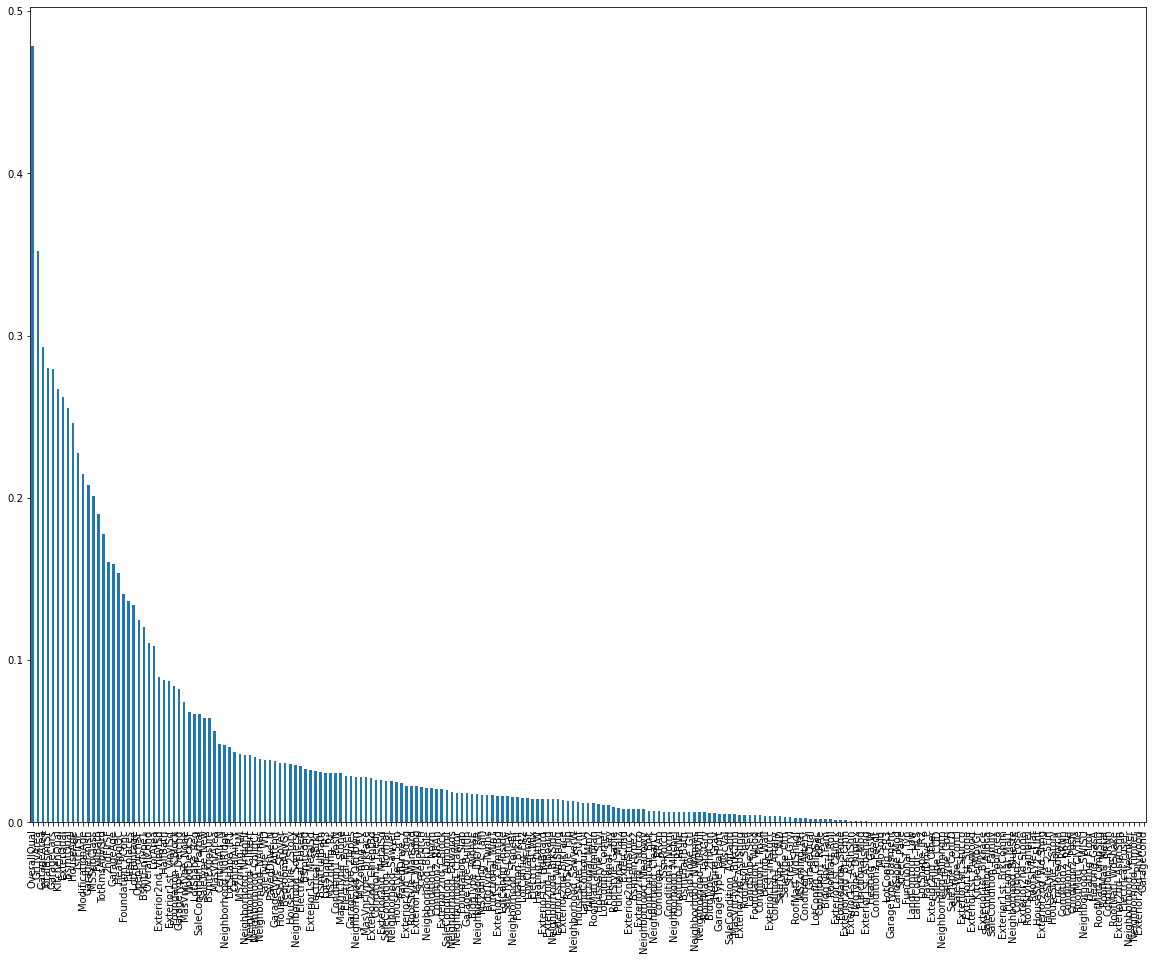

In [642]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,15))

In [643]:
from sklearn.feature_selection import SelectPercentile

In [644]:
selected=SelectPercentile(mutual_info_regression,percentile=76)

In [645]:
selected.fit(x,y)

SelectPercentile(percentile=76,
                 score_func=<function mutual_info_regression at 0x00000194D1488310>)

In [646]:
selected.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,

In [647]:
selectedfeatures=x.columns[selected.get_support()]

In [648]:
len(selectedfeatures)

167

In [649]:
# Here , we have selected only the features have some dependency on target feature.
inputdata=x[selectedfeatures]

In [650]:
inputdata.shape

(1460, 167)

In [651]:
inputdata.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0         120         60.0   4928.0            6            5       0.000   
1          20         95.0  15865.0            8            6       0.000   
2          60         92.0   9920.0            7            5       0.000   
3          20        105.0  11751.0            6            6     410.625   
4          20         60.0  16635.0            6            7     126.000   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         4         3             2             6   
1          4          4         3         4             5             6   
2          4          3         4         3             4             7   
3          3          3         4         3             2             5   
4          4          3         4         3             2             6   

   BsmtFinType2  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0             2       1078.0          3   958.000       0.0           0.0   
1             4       2052.0          5  2155.125       0.0           0.0   
2             2       1117.0          5  1127.000     886.0           0.0   
3             2       1844.0          5  1844.000       0.0           0.0   
4             2       1602.0          4  1602.000       0.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0      958.0             0             0         2         0             2   
1     2217.0             1             0         2         0             4   
2     2013.0             1             0         2         1             3   
3     1844.0             0             0         2         0             3   
4     1602.0             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageFinish  \
0             1            3             5           1             2   
1             1            4             8           1             1   
2             1            3             8           1             1   
3             1            3             7           1             2   
4             1            4             8           1             3   

   GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0           2       440.0           3           3         0.0        170.0   
1           2       621.0           3           3        81.0        170.0   
2           2       455.0           3           3       180.0        130.0   
3           2       546.0           3           3         0.0        122.0   
4           2       529.0           3           3       240.0          0.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  HouseAge  \
0              0          0            0         0        0     2.0      31.0   
1              0          0          224         0        0    10.0      37.0   
2              0          0            0         0        0     6.0      11.0   
3              0          0            0         0        0     1.0      33.0   
4              0          0            0         0        0     6.0      32.0   

   ModificationAge  GarageAge  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0             31.0       30.0                 0            0            0   
1             37.0       37.0                 0            0            0   
2             10.0       10.0                 0            0            0   
3             33.0       33.0                 0            0            0   
4              9.0       32.0                 0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  \
0            1            0            0            1             1   
1            1            0            0            1             1   
2            1            0            0            1             1   
3            1       

In [652]:
#Lets remove skewness of some categorical features:
skew_feature=['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea']

In [653]:
for feature in skew_feature:
    inputdata[feature]= np.log(inputdata[feature])

In [654]:
inputdata.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0         120     4.094345  8.502689            6            5       0.000   
1          20     4.553877  9.671871            8            6       0.000   
2          60     4.521789  9.202308            7            5       0.000   
3          20     4.653960  9.371694            6            6     410.625   
4          20     4.094345  9.719264            6            7     126.000   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         4         3             2             6   
1          4          4         3         4             5             6   
2          4          3         4         3             4             7   
3          3          3         4         3             2             5   
4          4          3         4         3             2             6   

   BsmtFinType2  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0             2     6.982863          3  6.864848       0.0           0.0   
1             4     7.626570          5  7.675604       0.0           0.0   
2             2     7.018402          5  7.027315     886.0           0.0   
3             2     7.519692          5  7.519692       0.0           0.0   
4             2     7.379008          4  7.379008       0.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   6.864848             0             0         2         0             2   
1   7.703910             1             0         2         0             4   
2   7.607381             1             0         2         1             3   
3   7.519692             0             0         2         0             3   
4   7.379008             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageFinish  \
0             1            3             5           1             2   
1             1            4             8           1             1   
2             1            3             8           1             1   
3             1            3             7           1             2   
4             1            4             8           1             3   

   GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0           2       440.0           3           3         0.0        170.0   
1           2       621.0           3           3        81.0        170.0   
2           2       455.0           3           3       180.0        130.0   
3           2       546.0           3           3         0.0        122.0   
4           2       529.0           3           3       240.0          0.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  HouseAge  \
0              0          0            0         0        0     2.0      31.0   
1              0          0          224         0        0    10.0      37.0   
2              0          0            0         0        0     6.0      11.0   
3              0          0            0         0        0     1.0      33.0   
4              0          0            0         0        0     6.0      32.0   

   ModificationAge  GarageAge  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0             31.0       30.0                 0            0            0   
1             37.0       37.0                 0            0            0   
2             10.0       10.0                 0            0            0   
3             33.0       33.0                 0            0            0   
4              9.0       32.0                 0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  \
0            1            0            0            1             1   
1            1            0            0            1             1   
2            1            0            0            1             1   
3            1 

# Standardization

In [655]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(inputdata)

In [656]:
x.shape

(1460, 221)

In [657]:
x.shape,y.shape

((1460, 221), (1460,))

# Machine Learning

In [658]:
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [659]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.6715379907576249 on Random State = 107


In [660]:
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=135,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [662]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [663]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_18648/3739904364.py, line 15)

In [665]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [666]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 28797.662100456622
mean_square_error of LinearRegression() model 1979811302.1917808
R2 Score of LinearRegression() model 59.70665538991805
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 27076.736043947818
mean_square_error of Ridge() model 1847479027.1791055
R2 Score of Ridge() model 62.39989688935735
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 28688.161509488917
mean_square_error of Lasso() model 1970710055.650627
R2 Score of Lasso() model 59.891884993799
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 32982.02511415525
mean_square_error of DecisionTreeRegressor() model 2654859036.9383564
R2 Score of DecisionTreeRegressor() model 45.96800717920886
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 46752.2253729163
mean_square_error of SVR() model 5

# Cross Validation

In [667]:
from sklearn.model_selection import cross_val_score

In [668]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 44495.07053811445
cross Validation score of root mean square  LinearRegression()  is  149400448623888.22
**************************************************
Root mean_square of  Ridge() model 42982.31063099221
cross Validation score of root mean square  Ridge()  is  48832.45604357864
**************************************************
Root mean_square of  Lasso() model 44392.68020350458
cross Validation score of root mean square  Lasso()  is  50362.297250207586
**************************************************
Root mean_square of  DecisionTreeRegressor() model 51525.32422933752
cross Validation score of root mean square  DecisionTreeRegressor()  is  59810.98584829718
**************************************************
Root mean_square of  SVR() model 74525.99544261348
cross Validation score of root mean square  SVR()  is  79421.49935505455
**************************************************
Root mean_square of  KNeighborsRegressor() model 4927